In [ ]:
 # Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install required libraries
!pip install spacy nltk
!python -m spacy download en_core_web_sm


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#

#Load the Text File
#Load the Shakespeare text file from the specified path

In [ ]:
# Load the text file
file_path = "/content/drive/My Drive/Shakespeare GPT/Shakespeare_01.txt"  # Replace with your file name
with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()

# Display a sample of the text
print("Sample Text (First 500 characters):")
print(text_data[:500])
print(f"\nDataset Size: {len(text_data)} characters")


Sample Text (First 500 characters):
If you cannot understand my argument, 
and declare "It's Greek to me", 
you are quoting Shakespeare; 
if you claim to be more sinned against than sinning, 
you are quoting Shakespeare; 
if you recall your salad days, 
you are quoting Shakespeare; 
if you act more in sorrow than in anger, 
if your wish is father to the thought, 
if your lost property has vanished into thin air, 
you are quoting Shakespeare; 
if you have ever refused to budge an inch or suffered from green-eyed jealousy, 
if you h

Dataset Size: 1977 characters


In [ ]:
!pip install spacy nltk
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#3. Preprocessing Function
#Standardize the text (convert to lowercase, remove punctuation, remove stopwords, lemmatize, and POS tagging).
#4. Apply Preprocessing
#Run the preprocessing function on the loaded text.

In [ ]:
import nltk
nltk.download('punkt_tab') # Download the required package

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load spaCy model and download NLTK resources
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization using spaCy
    doc = nlp(" ".join(filtered_tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]

    # POS tagging using spaCy
    pos_tags = [(token.text, token.pos_) for token in doc]

    return {
        "original_text": text,
        "tokens": tokens,
        "filtered_tokens": filtered_tokens,
        "lemmatized_tokens": lemmatized_tokens,
        "pos_tags": pos_tags
    }
# Apply preprocessing
preprocessed_data = preprocess_text(text_data)

# Display results
print("\nSample Preprocessed Data:")
print("Tokens (First 20):", preprocessed_data["tokens"][:20])
print("Filtered Tokens (Stopwords Removed, First 20):", preprocessed_data["filtered_tokens"][:20])
print("Lemmatized Tokens (First 20):", preprocessed_data["lemmatized_tokens"][:20])
print("Parts of Speech Tags (First 10):", preprocessed_data["pos_tags"][:10])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Sample Preprocessed Data:
Tokens (First 20): ['if', 'you', 'can', 'not', 'understand', 'my', 'argument', 'and', 'declare', 'its', 'greek', 'to', 'me', 'you', 'are', 'quoting', 'shakespeare', 'if', 'you', 'claim']
Filtered Tokens (Stopwords Removed, First 20): ['understand', 'argument', 'declare', 'greek', 'quoting', 'shakespeare', 'claim', 'sinned', 'sinning', 'quoting', 'shakespeare', 'recall', 'salad', 'days', 'quoting', 'shakespeare', 'act', 'sorrow', 'anger', 'wish']
Lemmatized Tokens (First 20): ['understand', 'argument', 'declare', 'greek', 'quote', 'shakespeare', 'claim', 'sin', 'sin', 'quote', 'shakespeare', 'recall', 'salad', 'day', 'quote', 'shakespeare', 'act', 'sorrow', 'anger', 'wish']
Parts of Speech Tags (First 10): [('understand', 'VERB'), ('argument', 'NOUN'), ('declare', 'VERB'), ('greek', 'NOUN'), ('quoting', 'VERB'), ('shakespeare', 'PROPN'), ('claim', 'NOUN'), ('sinned', 'VERB'), ('sinning', 'VERB'), ('quoting', 'VERB')]


#Indexing Words

In [ ]:
 # Preprocess the text
preprocessed_data = preprocess_text(text_data)

# Get the tokens from preprocessing
tokens = preprocessed_data["tokens"]

# Create an index: {word: [list of positions in text]}
def create_index(tokens):
    index = {}
    for i, token in enumerate(tokens):
        if token not in index:
            index[token] = []
        index[token].append(i)
    return index

# Create the index for tokens
index = create_index(tokens)

# Example usage of the index
search_word = "love"
if search_word in index:
    positions = index[search_word]
    print(f"The word '{search_word}' appears at positions: {positions}")
else:
    print(f"The word '{search_word}' was not found in the text.")

# Display the index (optional)
print("\nIndex (first 5 words):", dict(list(index.items())[:5]))

The word 'love' was not found in the text.

Index (first 5 words): {'if': [0, 17, 31, 41, 50, 58, 71, 85, 92, 106, 151, 190, 203, 220, 234, 242, 256, 279, 298, 308, 317], 'you': [1, 13, 18, 27, 32, 37, 42, 67, 72, 86, 93, 107, 152, 172, 180, 191, 204, 221, 243, 252, 257, 286, 293, 299, 309, 318, 362], 'can': [2], 'not': [3, 122], 'understand': [4]}


#Visualization
#A. Word Frequency Distribution
#Visualize the most common words in the tokenized data:

<ipython-input-7-255f155268b9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="viridis")


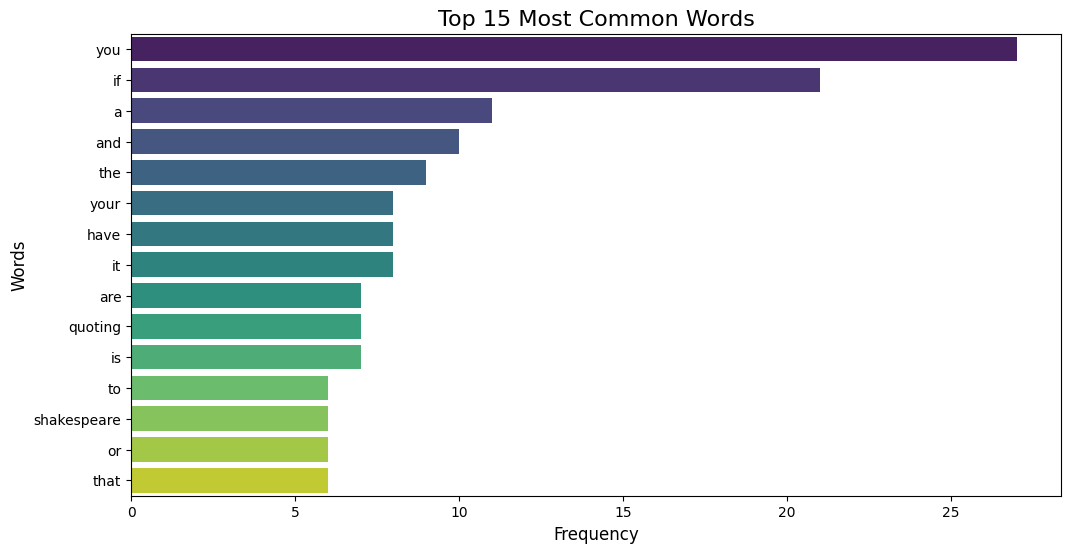

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Count the frequency of each token
word_counts = Counter(tokens)

# Get the most common words
most_common_words = word_counts.most_common(15)

# Split into words and counts for plotting
words, counts = zip(*most_common_words)

# Plot the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=words, palette="viridis")
plt.title("Top 15 Most Common Words", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Words", fontsize=12)
plt.show()


#B. Word Position Visualization
#Visualize the positions of a specific word in the text:

In [ ]:
# Example: Visualize positions of the word "love"
search_word = "love"
if search_word in index:
    positions = index[search_word]

    # Create a scatter plot for the positions
    plt.figure(figsize=(10, 3))
    plt.scatter(positions, [1] * len(positions), color="blue", alpha=0.6, label=search_word)
    plt.title(f"Positions of the Word '{search_word}' in the Text", fontsize=16)
    plt.xlabel("Position in Text", fontsize=12)
    plt.yticks([])  # Remove y-axis ticks for clarity
    plt.legend(fontsize=12)
    plt.show()
else:
    print(f"The word '{search_word}' was not found in the text.")


The word 'love' was not found in the text.


#C. Word Length Distribution
#Visualize the distribution of word lengths in the dataset:

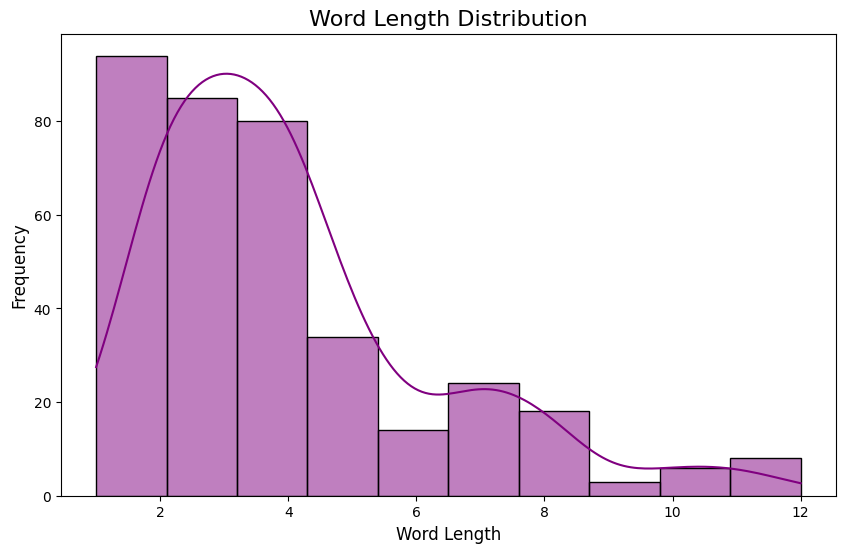

In [ ]:
# Calculate the lengths of all tokens
word_lengths = [len(word) for word in tokens]

# Plot the word length distribution
plt.figure(figsize=(10, 6))
sns.histplot(word_lengths, bins=10, kde=True, color="purple")
plt.title("Word Length Distribution", fontsize=16)
plt.xlabel("Word Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


#D. Stopword vs Non-Stopword Proportion
#Compare the number of stopwords and non-stopwords:

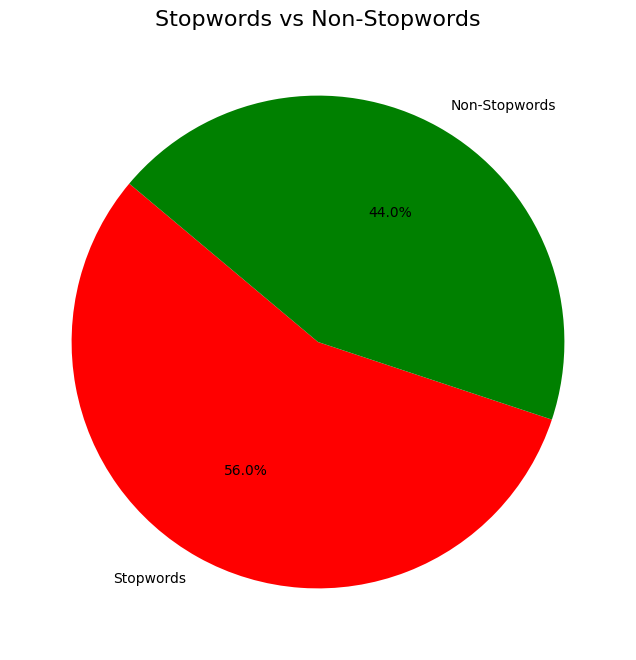

In [ ]:
# Count stopwords and non-stopwords
from nltk.corpus import stopwords #
stopword_count = sum(1 for word in tokens if word in stop_words)
non_stopword_count = len(tokens) - stopword_count

# Pie chart data
labels = ["Stopwords", "Non-Stopwords"]
sizes = [stopword_count, non_stopword_count]
colors = ["red", "green"]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Stopwords vs Non-Stopwords", fontsize=16)
plt.show()


#Split the data train test validation

Train Set Size: 292 tokens
Test Set Size: 37 tokens
Validation Set Size: 37 tokens


<ipython-input-17-c1b9b5674185>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="viridis")


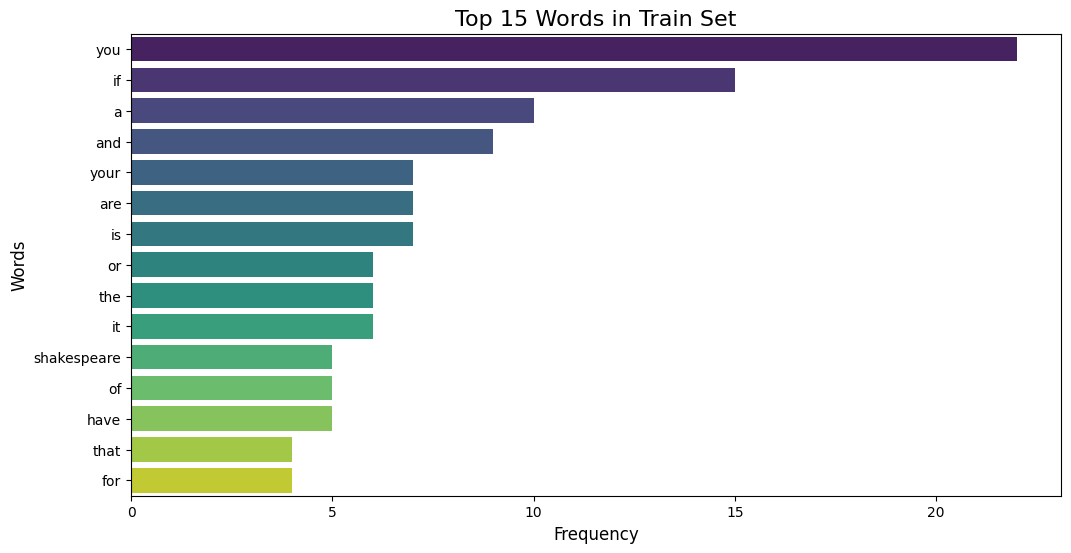

<ipython-input-17-c1b9b5674185>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="viridis")


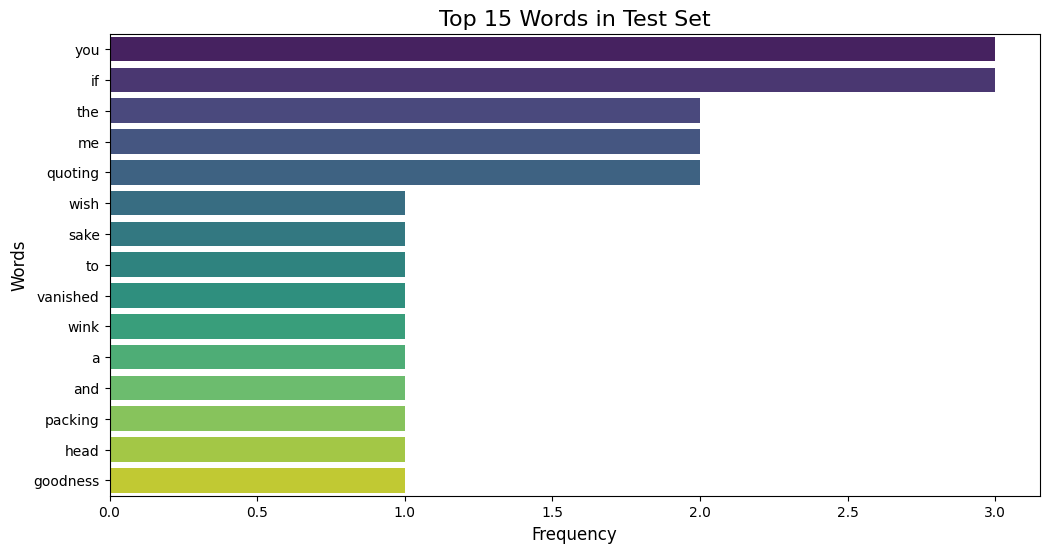

<ipython-input-17-c1b9b5674185>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="viridis")


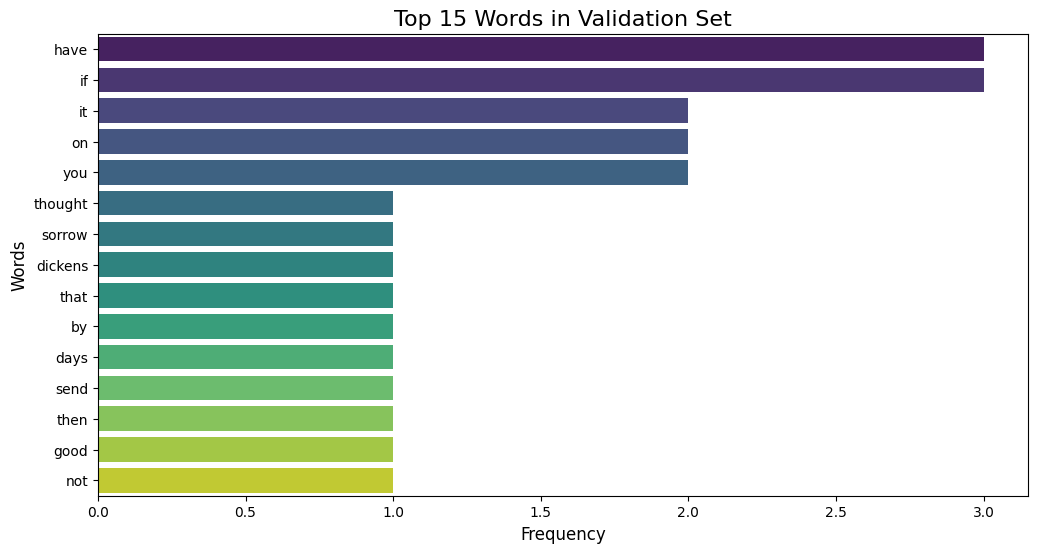

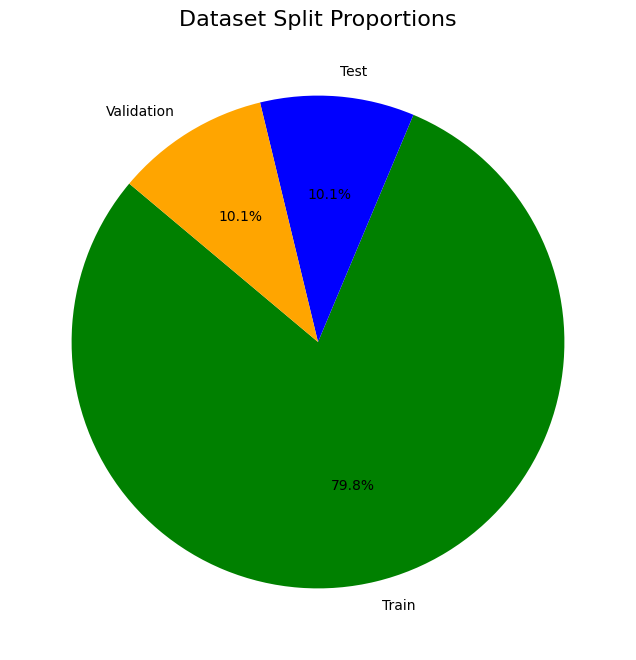

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Step 1: Create the Dataset from Tokens
# Using the `tokens` from preprocessing
data = tokens  # Replace with `filtered_tokens` or `lemmatized_tokens` as needed

# Split data into train, test, and validation (80% train, 10% test, 10% validation)
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)
test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Display the sizes of each split
print(f"Train Set Size: {len(train_data)} tokens")
print(f"Test Set Size: {len(test_data)} tokens")
print(f"Validation Set Size: {len(val_data)} tokens")

# Step 2: Visualization of Word Frequencies in Splits

def visualize_split_distribution(data, title):
    # Count word frequencies
    word_counts = Counter(data)
    most_common_words = word_counts.most_common(15)

    # Split words and counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the word frequency distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=counts, y=words, palette="viridis")
    plt.title(title, fontsize=16)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Words", fontsize=12)
    plt.show()

# Visualize distributions
visualize_split_distribution(train_data, "Top 15 Words in Train Set")
visualize_split_distribution(test_data, "Top 15 Words in Test Set")
visualize_split_distribution(val_data, "Top 15 Words in Validation Set")

# Step 3: Visualize the Sizes of Splits
split_sizes = [len(train_data), len(test_data), len(val_data)]
split_labels = ["Train", "Test", "Validation"]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(split_sizes, labels=split_labels, autopct="%1.1f%%", startangle=140, colors=["green", "blue", "orange"])
plt.title("Dataset Split Proportions", fontsize=16)
plt.show()


#Vectorization(Skipgram)

In [ ]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
# Preprocessed tokens from the earlier steps
sentences = [tokens]  # Replace `tokens` with preprocessed tokens like `filtered_tokens` if needed

# Display a sample of the sentences
print(f"Number of sentences: {len(sentences)}")
print(f"Sample sentence: {sentences[0][:10]}")  # Show the first 10 tokens of the first sentence
# Train Word2Vec model using the Skip-Gram approach (sg=1)
word2vec_model = Word2Vec(
    sentences=sentences,
    vector_size=100,  # Dimensionality of word embeddings
    window=5,         # Context window size
    min_count=1,      # Minimum word frequency to include in vocabulary
    sg=1,             # 1 for Skip-Gram; 0 for CBOW
    workers=4,        # Number of threads to use
    epochs=10         # Number of training epochs
)

# Save the model for future use
word2vec_model.save("shakespeare_word2vec.model")

# Display vocabulary size
print(f"Vocabulary Size: {len(word2vec_model.wv.index_to_key)}")


Number of sentences: 1
Sample sentence: ['if', 'you', 'can', 'not', 'understand', 'my', 'argument', 'and', 'declare', 'its']
Vocabulary Size: 187


#4. Explore the Trained Word Embeddings
#A. Get Word Embedding
#Retrieve the vector representation of a word (e.g., "love"):

In [ ]:
word = "love"
if word in word2vec_model.wv:
    print(f"Vector for '{word}':\n{word2vec_model.wv[word]}")
else:
    print(f"The word '{word}' is not in the vocabulary.")


The word 'love' is not in the vocabulary.


In [ ]:
similar_words = word2vec_model.wv.most_similar("if", topn=5)
print("Top 5 words similar to 'if':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


Top 5 words similar to 'if':
you: 0.6874
are: 0.6397
and: 0.6153
me: 0.5899
on: 0.5853


#B. Find Similar Words
#Find words similar to a given word:



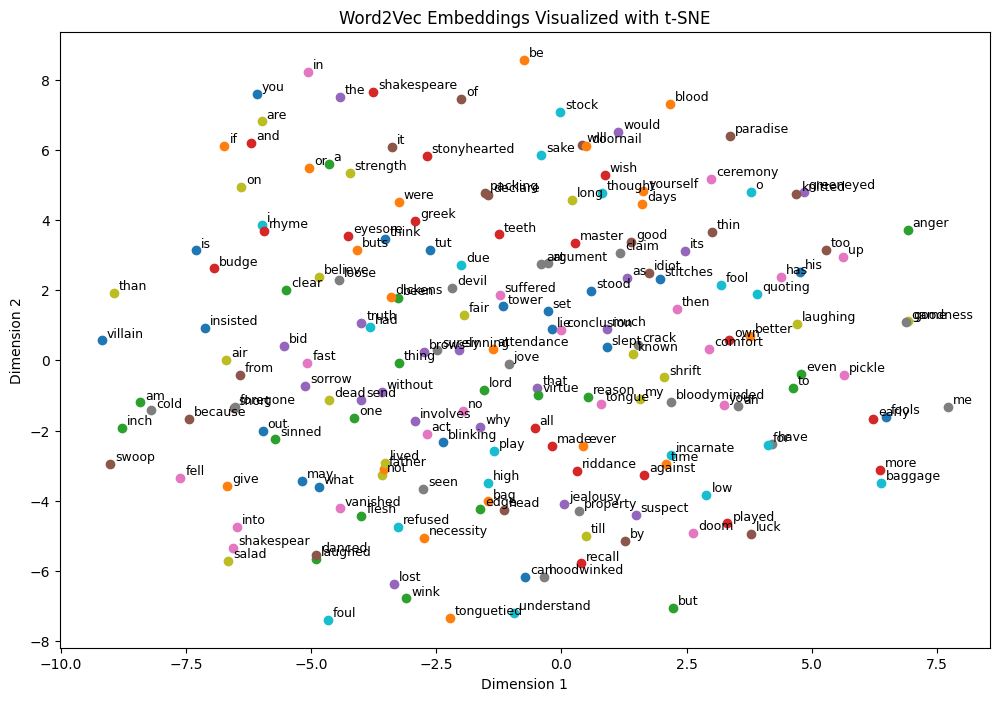

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensionality of word vectors
word_vectors = word2vec_model.wv.vectors
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot the words
plt.figure(figsize=(12, 8))
for i, word in enumerate(word2vec_model.wv.index_to_key):
    x, y = word_vectors_2d[i, :]
    plt.scatter(x, y)
    plt.text(x + 0.1, y + 0.1, word, fontsize=9)

plt.title("Word2Vec Embeddings Visualized with t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


#Prepare Input and Output Data
#Format the dataset into input-output pairs for the Seq2Seq model

In [ ]:
# Tokenizer from earlier
from tensorflow.keras.preprocessing.text import Tokenizer

# Prepare input-output pairs
input_sequences = []
output_sequences = []

# Generate input-output pairs from tokens
for i in range(1, len(tokens)):
    input_sequences.append(tokens[:i])  # Inputs are prefixes
    output_sequences.append(tokens[i])  # Outputs are next words

# Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokens)
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size

# Convert to integer sequences
input_sequences = tokenizer.texts_to_sequences([' '.join(seq) for seq in input_sequences])
output_sequences = tokenizer.texts_to_sequences(output_sequences)

# Pad input sequences and prepare output
max_input_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_input_len, padding='post')
output_sequences = np.array(output_sequences).reshape(-1)

# Prepare decoder input
decoder_input_sequences = np.expand_dims(output_sequences, axis=-1)

print(f"Vocabulary Size: {vocab_size}")
print(f"Max Input Length: {max_input_len}")


Vocabulary Size: 188
Max Input Length: 365


#Define the Seq2Seq Model
#Build the Encoder-Decoder architecture

In [ ]:
# Encoder
encoder_inputs = Input(shape=(max_input_len,))
encoder_embedding = Embedding(vocab_size, 100)(encoder_inputs)
encoder_lstm = LSTM(128, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(1,))
decoder_embedding = Embedding(vocab_size, 100)(decoder_inputs)
decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Full Seq2Seq Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 365)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 365, 100)       │         18,800 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 100)         │         18,800 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 128), (None,   │        117,248 │ embedding[0][0]        │
│                           │ 128), (None, 128)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, 1, 128),       │        117,248 │ embedding_1[0][0],     │
│                           │ (None, 128), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 128)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1, 188)         │         24,252 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 296,348 (1.13 MB)

 Trainable params: 296,348 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    [input_sequences, decoder_input_sequences],
    np.expand_dims(output_sequences, axis=-1),
    batch_size=64,
    epochs=10,
    validation_split=0.1
)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 756ms/step - accuracy: 0.0452 - loss: 5.2302 - val_accuracy: 0.0270 - val_loss: 5.2333
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 652ms/step - accuracy: 0.1501 - loss: 5.1345 - val_accuracy: 0.0270 - val_loss: 5.3581
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.0782 - loss: 4.8295 - val_accuracy: 0.0270 - val_loss: 5.6493
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 652ms/step - accuracy: 0.0782 - loss: 4.7023 - val_accuracy: 0.0270 - val_loss: 5.7929
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.0824 - loss: 4.6328 - val_accuracy: 0.0270 - val_loss: 5.9172
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 644ms/step - accuracy: 0.0713 - loss: 4.6173 - val_accuracy: 0.0270 - val_loss: 6.0338
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.0789 - loss: 4.5700 - val_accuracy: 0.0270 - val_loss: 6.1197
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 650ms/step - accuracy: 0.0829 - loss: 4.5739 - val_accuracy: 0.0270 - val_loss: 6.2146


In [ ]:
# Inference Encoder Model
encoder_model = Model(encoder_inputs, encoder_states)

# Inference Decoder Model
decoder_state_input_h = Input(shape=(128,))
decoder_state_input_c = Input(shape=(128,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_embedding, initial_state=decoder_states_inputs
)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)


In [ ]:
def generate_shakespeare_quote(input_text):
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_seq = pad_sequences(input_seq, maxlen=max_input_len, padding='post')

    # Encode input sequence
    states = encoder_model.predict(input_seq)

    # Decode sequence
    target_seq = np.array([tokenizer.word_index['<start>']])  # Start token
    output = []

    for _ in range(50):  # Generate up to 50 tokens
        predictions, h, c = decoder_model.predict([target_seq] + states)
        predicted_word_index = np.argmax(predictions[0, -1, :])
        predicted_word = tokenizer.index_word.get(predicted_word_index, '<unk>')

        if predicted_word == '<end>':  # Stop token
            break

        output.append(predicted_word)
        target_seq = np.array([predicted_word_index])
        states = [h, c]

    return ' '.join(output)

# Test the model
print(generate_shakespeare_quote("love"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


KeyError: '<start>'

In [ ]:
def generate_shakespeare_quote(input_text):
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_seq = pad_sequences(input_seq, maxlen=max_input_len, padding='post')

    # Encode input sequence
    states = encoder_model.predict(input_seq)

    # Decode sequence
    # Instead of assuming '<start>', use the index of the first word in the vocabulary
    # or a special token if you've added one during preprocessing.
    # Here, we'll use the index of the first word.
    target_seq = np.array([1])  # Assuming the first word has index 1
    output = []

    for _ in range(50):  # Generate up to 50 tokens
        predictions, h, c = decoder_model.predict([target_seq] + states)
        predicted_word_index = np.argmax(predictions[0, -1, :])
        predicted_word = tokenizer.index_word.get(predicted_word_index, '<unk>')

        if predicted_word == '<end>':  # Stop token
            break

        output.append(predicted_word)
        target_seq = np.array([predicted_word_index])
        states = [h, c]

    return ' '.join(output)

# Test the model
print(generate_shakespeare_quote("love"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━

#Evualte the model

In [ ]:
# Assuming input_sequences, output_sequences, decoder_input_sequences are defined from previous steps

# Split data into train, test, and validation (80% train, 10% test, 10% validation)
train_input_sequences, temp_input_sequences, train_decoder_input_sequences, temp_decoder_input_sequences, train_output_sequences, temp_output_sequences = train_test_split(
    input_sequences, decoder_input_sequences, output_sequences, test_size=0.2, random_state=42
)
test_input_sequences, val_input_sequences, test_decoder_input_sequences, val_decoder_input_sequences, test_output_sequences, val_output_sequences = train_test_split(
    temp_input_sequences, temp_decoder_input_sequences, temp_output_sequences, test_size=0.5, random_state=42
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(
    [test_input_sequences, test_decoder_input_sequences],
    np.expand_dims(test_output_sequences, axis=-1)
)
print(f"Test Accuracy: {test_accuracy:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1447 - loss: 4.8317 
Test Accuracy: 0.14


In [ ]:
# Save the trained model
model.save("Shakespeare quote generator.h5")

# Download the model
from google.colab import files
files.download("Shakespeare quote generator.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>